<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Midterm/HOA%205.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<u>**Hands-On Activity 5.1** | **Decision Tree**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 10/10/2024
**Date Submitted**: | 10/10/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

# Activity 3.1 Decision Tree

Objective(s):

This activity aims to perform classification using Decision Tree

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Decision Tree.
* Demonstrate how to evaluate the performance of the model.
* Demonstrate how to create tree visualization of the model.

Resources:
* Jupyter Notebook
* kyphosis

Procedure:

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [ ]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Check the pairplot of the data

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

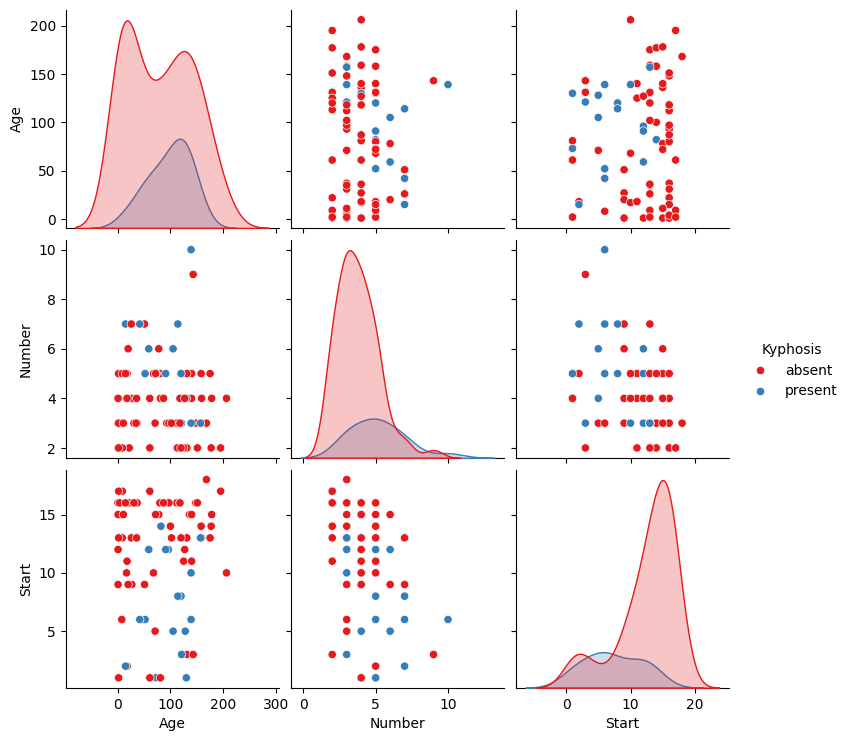

In [ ]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

Interpret the result of the pairplot

<font color = "blue"> It can be noticed that there is no strong correlations between the features. However, there seems to be a clearer decision boundary that can be made in features Start and Age.



Build the model using Decision Tree

Split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [ ]:
dtree.tree_.node_count, dtree.tree_.max_depth

(21, 6)

Predict and evaluate the model

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      0.67      0.73        18
     present       0.40      0.57      0.47         7

    accuracy                           0.64        25
   macro avg       0.60      0.62      0.60        25
weighted avg       0.69      0.64      0.66        25



Interpret the precision, recall and f1-score

<font color="blue"> The precision, recall, and f1-scores for both present and absent are low, with the present target having very low scores (< 0.6). This suggests that the model trained is slightly inaccurate </font>

In [ ]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[12  6]
 [ 3  4]]


Interpret the performance using classification matrix

<font color="blue"> The diagonals of the confusion matrix compared to the non-diagonals suggest that the model is inaccurate particularly in the absent target. Though this could also be attributed to having few datapoints to test. </font>

In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.64


Interpret the performance of the model using accuracy score

<font color="blue"> Overall, the accuracy is not too accurate as it only has a slight advantage compared to choosing randomly (0.5). </font>

Create a tree visualization of the model

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

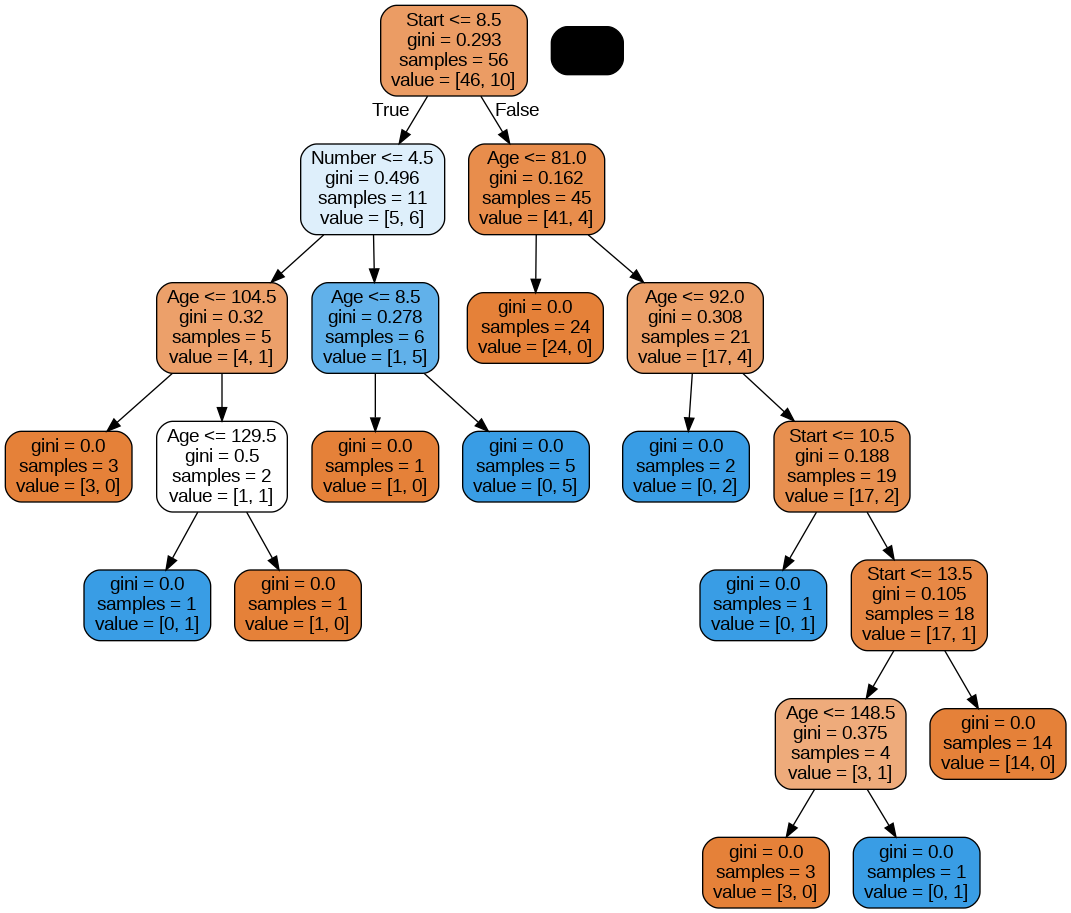

In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

In [ ]:
# The dataset that I have chosen is the Room Occupancy using IoT dataset
# Link: https://www.kaggle.com/datasets/kukuroo3/room-occupancy-detection-data-iot-sensor
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

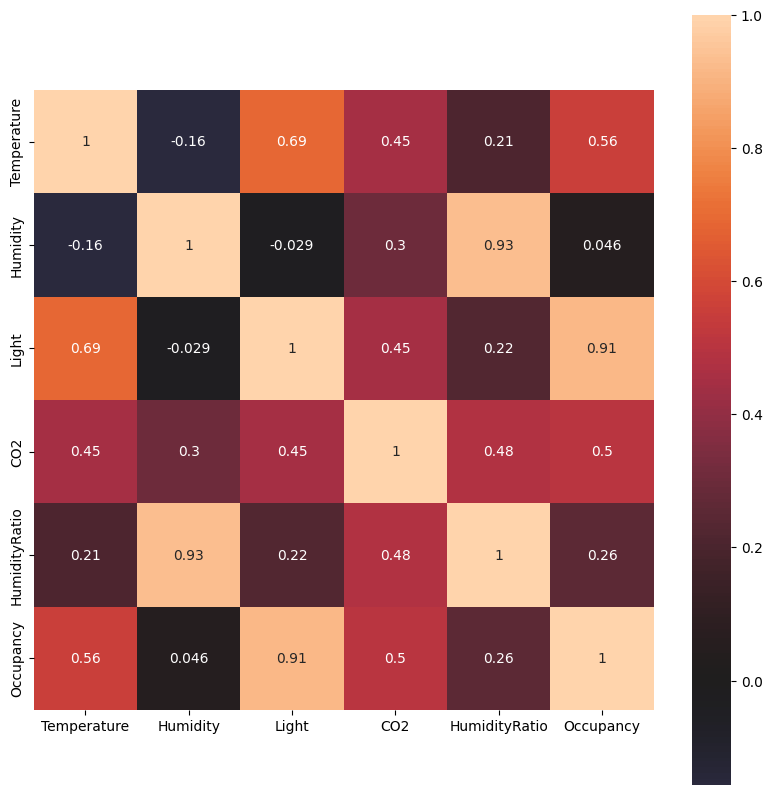

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
df.drop(['Humidity'], axis=1, inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df

,Temperature,Light,CO2,HumidityRatio,Occupancy
0,23.7000,585.200000,749.200000,0.004764,1
1,23.7180,578.400000,760.400000,0.004773,1
2,23.7300,572.666667,769.666667,0.004765,1
3,23.7225,493.750000,774.750000,0.004744,1
4,23.7540,488.600000,779.000000,0.004767,1
...,...,...,...,...,...
20555,20.8150,429.750000,1505.250000,0.004213,1
20556,20.8650,423.500000,1514.500000,0.004230,1
20557,20.8900,423.500000,1521.500000,0.004237,1
20558,20.8900,418.750000,1632.000000,0.004279,1


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df.describe()

,Temperature,Light,CO2,HumidityRatio,Occupancy
count,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000
mean,20.964184,140.502353,703.073166,0.004244,0.248287
std,1.060804,215.011742,316.089682,0.000762,0.432030
min,19.000000,0.000000,412.750000,0.002674,0.000000
25%,20.267500,0.000000,466.000000,0.003734,0.000000
50%,20.790000,0.000000,574.000000,0.004300,0.000000
75%,21.650000,408.416667,824.000000,0.004836,0.000000
max,24.408333,1697.250000,2076.500000,0.006476,1.000000


In [ ]:
df.median()

,0
Temperature,20.7900
Light,0.0000
CO2,574.0000
HumidityRatio,0.0043
Occupancy,0.0000


In [ ]:
df.mode().T

,0
Temperature,20.390000
Light,0.000000
CO2,438.000000
HumidityRatio,0.003327
Occupancy,0.000000


In [ ]:
# Build the model using Decision Tree
from sklearn.model_selection import train_test_split

X = df.drop('Occupancy', axis=1)
y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate the model using classification report, accuracy, and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))
# It can be seen that the metrics are all high (0.97-1.0), which suggests an accurate model

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4345
           1       0.97      0.98      0.98      1391

    accuracy                           0.99      5736
   macro avg       0.98      0.99      0.99      5736
weighted avg       0.99      0.99      0.99      5736



In [ ]:
# Getting the accuracy score
print(accuracy_score(y_test, y_pred))
# The accuracy computed is high (0.98), which might suggest overfitting

0.9890167364016736


<Axes: >

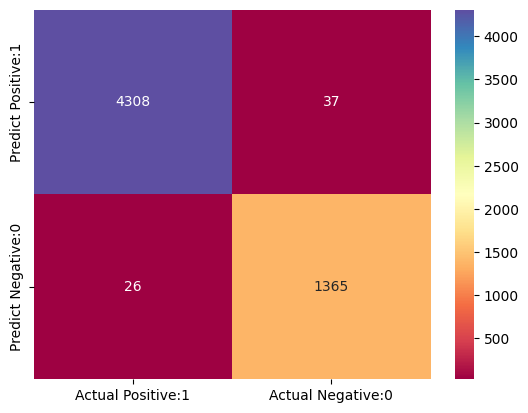

In [ ]:
# Getting the confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],
                         index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Spectral')

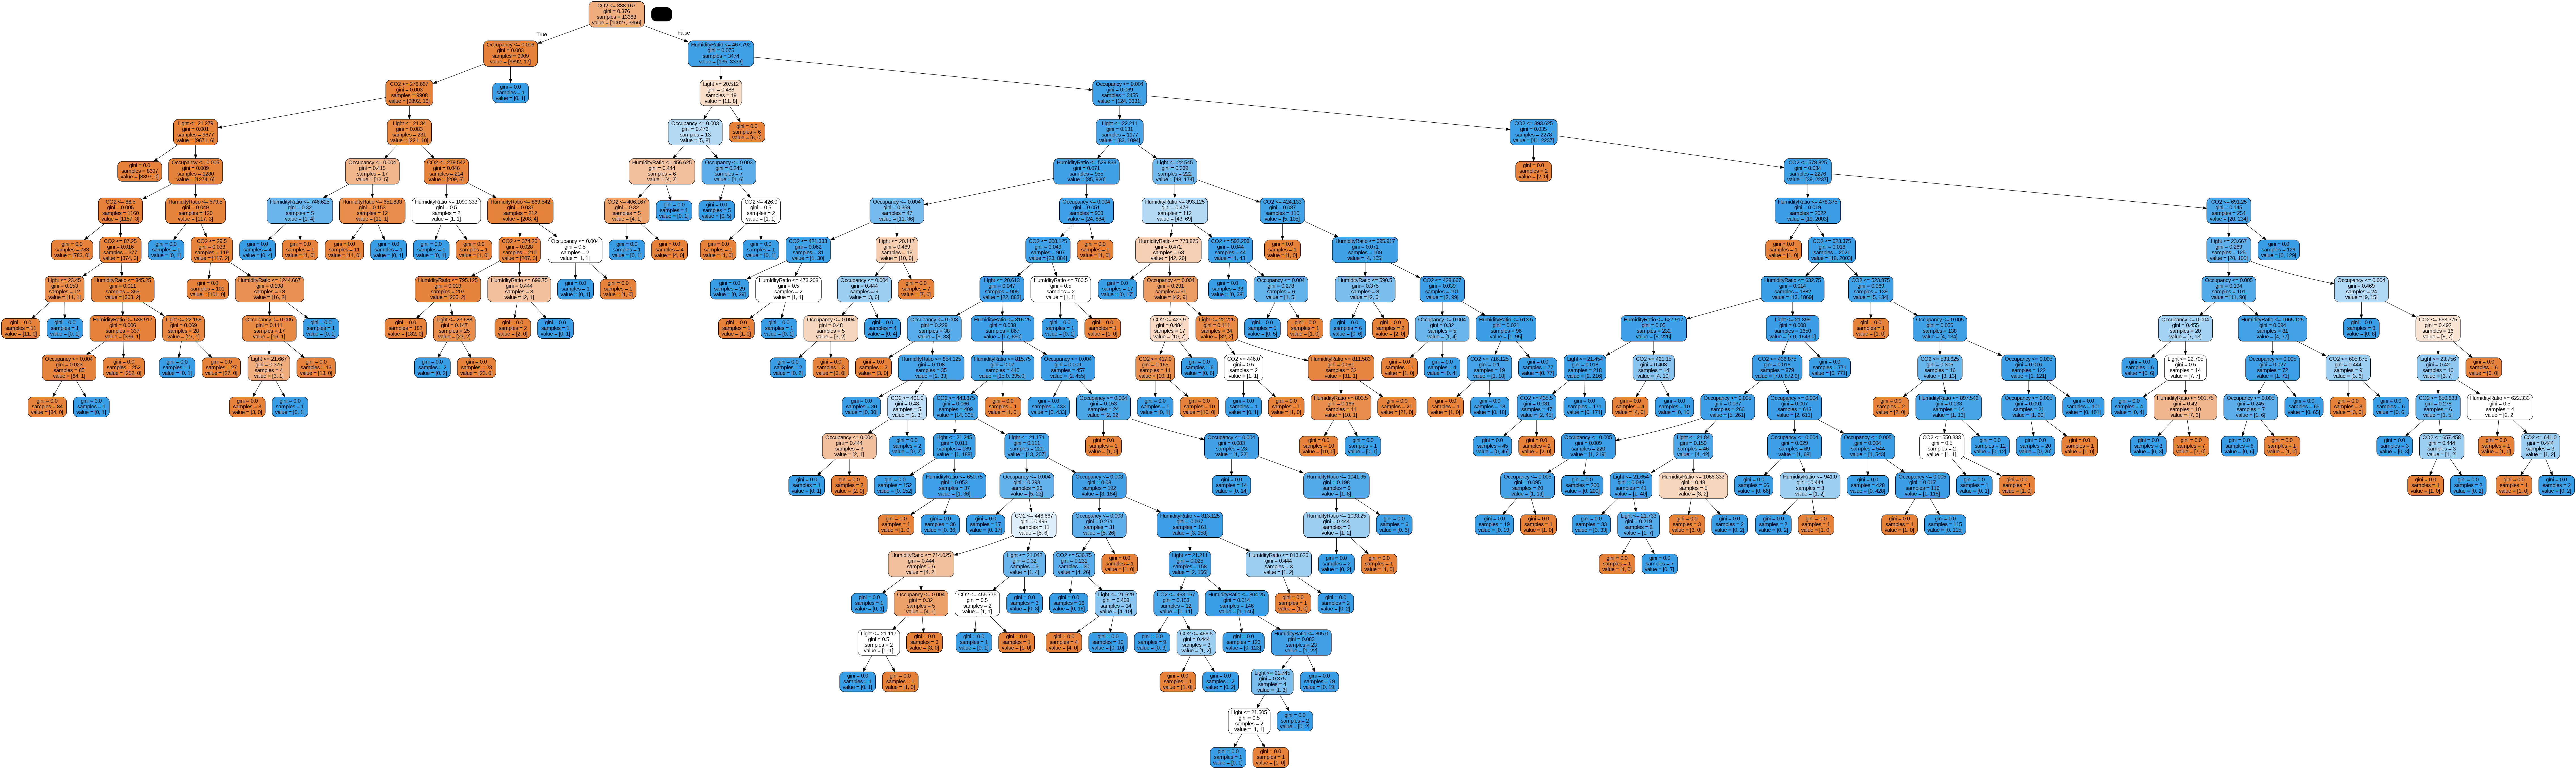

In [ ]:
# Create a tree visualization of the model
from io import StringIO
from IPython.display import Image, display
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
features = list(df.columns[1:])
features

export_graphviz(model, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'occupancy_tree.png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)
# It can be noticed that the root node is CO2 which is not the feature with highest correlation
# It can also be noticed that the positive target (colored as blue) has more nodes compared
# to negative target (colored as orange) since the dataset contains more positive compared to negative targets

Conclusion

I conclude that decision trees classify data by creating a tree with nodes having different conditions for each feature, and to determine the amount of nodes to create, we use the Gini score where we stop when the Gini score is at the minimum, which indicate that the datapoint can be perfectly separated into classes.